# Exam score

## Importacion bibliotecas

In [2]:
# manejo de datos en tablas
import pandas as pd

# Calculo numerico y manejos de arreglo
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

## Análisis de datos

In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


## Datos categóricos

In [6]:
le = LabelEncoder()

In [7]:
df.Parental_Involvement.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [8]:
parental_involvement_map = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}
df["Parental_Involvement"] = df["Parental_Involvement"].map(parental_involvement_map)

In [9]:
df.Parental_Involvement.unique()

array([0, 1, 2])

In [10]:
df.Access_to_Resources.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [11]:
access_to_resources_map = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}

df["Access_to_Resources"] = df["Access_to_Resources"].map(access_to_resources_map)

In [12]:
df.Access_to_Resources.unique()

array([2, 1, 0])

In [13]:
df.Extracurricular_Activities.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df = pd.get_dummies(df, columns=["Extracurricular_Activities"], drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Hours_Studied                   6607 non-null   int64 
 1   Attendance                      6607 non-null   int64 
 2   Parental_Involvement            6607 non-null   int64 
 3   Access_to_Resources             6607 non-null   int64 
 4   Sleep_Hours                     6607 non-null   int64 
 5   Previous_Scores                 6607 non-null   int64 
 6   Motivation_Level                6607 non-null   object
 7   Internet_Access                 6607 non-null   object
 8   Tutoring_Sessions               6607 non-null   int64 
 9   Family_Income                   6607 non-null   object
 10  Teacher_Quality                 6529 non-null   object
 11  School_Type                     6607 non-null   object
 12  Peer_Influence                  6607 non-null   

In [16]:
df.Motivation_Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [17]:
motivation_level_map = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}

In [18]:
df["Motivation_Level"] = df["Motivation_Level"].map(motivation_level_map)

In [19]:
df.Internet_Access.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df = pd.get_dummies(df, columns=["Internet_Access"], drop_first=True)

In [21]:
df.Family_Income.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [22]:
family_income_map = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}

df["Family_Income"] = df["Family_Income"].map(family_income_map)

In [23]:
df.Peer_Influence.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [24]:
peer_influence_map = {
    "Negative" : 0,
    "Neutral" : 1,
    "Positive" : 2
}

df["Peer_Influence"] = df["Peer_Influence"].map(peer_influence_map)

In [25]:
df.Learning_Disabilities.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df = pd.get_dummies(df, columns=["Learning_Disabilities"], drop_first=True)

In [27]:
df.Parental_Education_Level.unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [28]:
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0])

In [29]:
parental_education_map = {
    "High School" : 0,
    "College" : 1,
    "Postgraduate" : 2
}

df["Parental_Education_Level"] = df["Parental_Education_Level"].map(parental_education_map)

In [30]:
df.Distance_from_Home.unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [31]:
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])

In [32]:
distance_from_Home_map = {
    "Near" : 0,
    "Moderate" : 1,
    "Far" : 2
}

df["Distance_from_Home"] = df["Distance_from_Home"].map(distance_from_Home_map)

In [33]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [34]:
df = pd.get_dummies(df, columns=["Gender"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Hours_Studied                   6607 non-null   int64 
 1   Attendance                      6607 non-null   int64 
 2   Parental_Involvement            6607 non-null   int64 
 3   Access_to_Resources             6607 non-null   int64 
 4   Sleep_Hours                     6607 non-null   int64 
 5   Previous_Scores                 6607 non-null   int64 
 6   Motivation_Level                6607 non-null   int64 
 7   Tutoring_Sessions               6607 non-null   int64 
 8   Family_Income                   6607 non-null   int64 
 9   Teacher_Quality                 6529 non-null   object
 10  School_Type                     6607 non-null   object
 11  Peer_Influence                  6607 non-null   int64 
 12  Physical_Activity               6607 non-null   

In [36]:
df.Teacher_Quality.unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [37]:
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0])

In [38]:
teacher_qua_map = {
    "Low" : 0,
    "Medium" : 1,
    "High" : 2
}

df["Teacher_Quality"] = df["Teacher_Quality"].map(teacher_qua_map)

In [39]:
df.School_Type.unique()

array(['Public', 'Private'], dtype=object)

In [40]:
df = pd.get_dummies(df, columns=["School_Type"], drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6607 non-null   int64
 1   Attendance                      6607 non-null   int64
 2   Parental_Involvement            6607 non-null   int64
 3   Access_to_Resources             6607 non-null   int64
 4   Sleep_Hours                     6607 non-null   int64
 5   Previous_Scores                 6607 non-null   int64
 6   Motivation_Level                6607 non-null   int64
 7   Tutoring_Sessions               6607 non-null   int64
 8   Family_Income                   6607 non-null   int64
 9   Teacher_Quality                 6607 non-null   int64
 10  Peer_Influence                  6607 non-null   int64
 11  Physical_Activity               6607 non-null   int64
 12  Parental_Education_Level        6607 non-null   int64
 13  Dis

## Análisis de correlación

<Axes: >

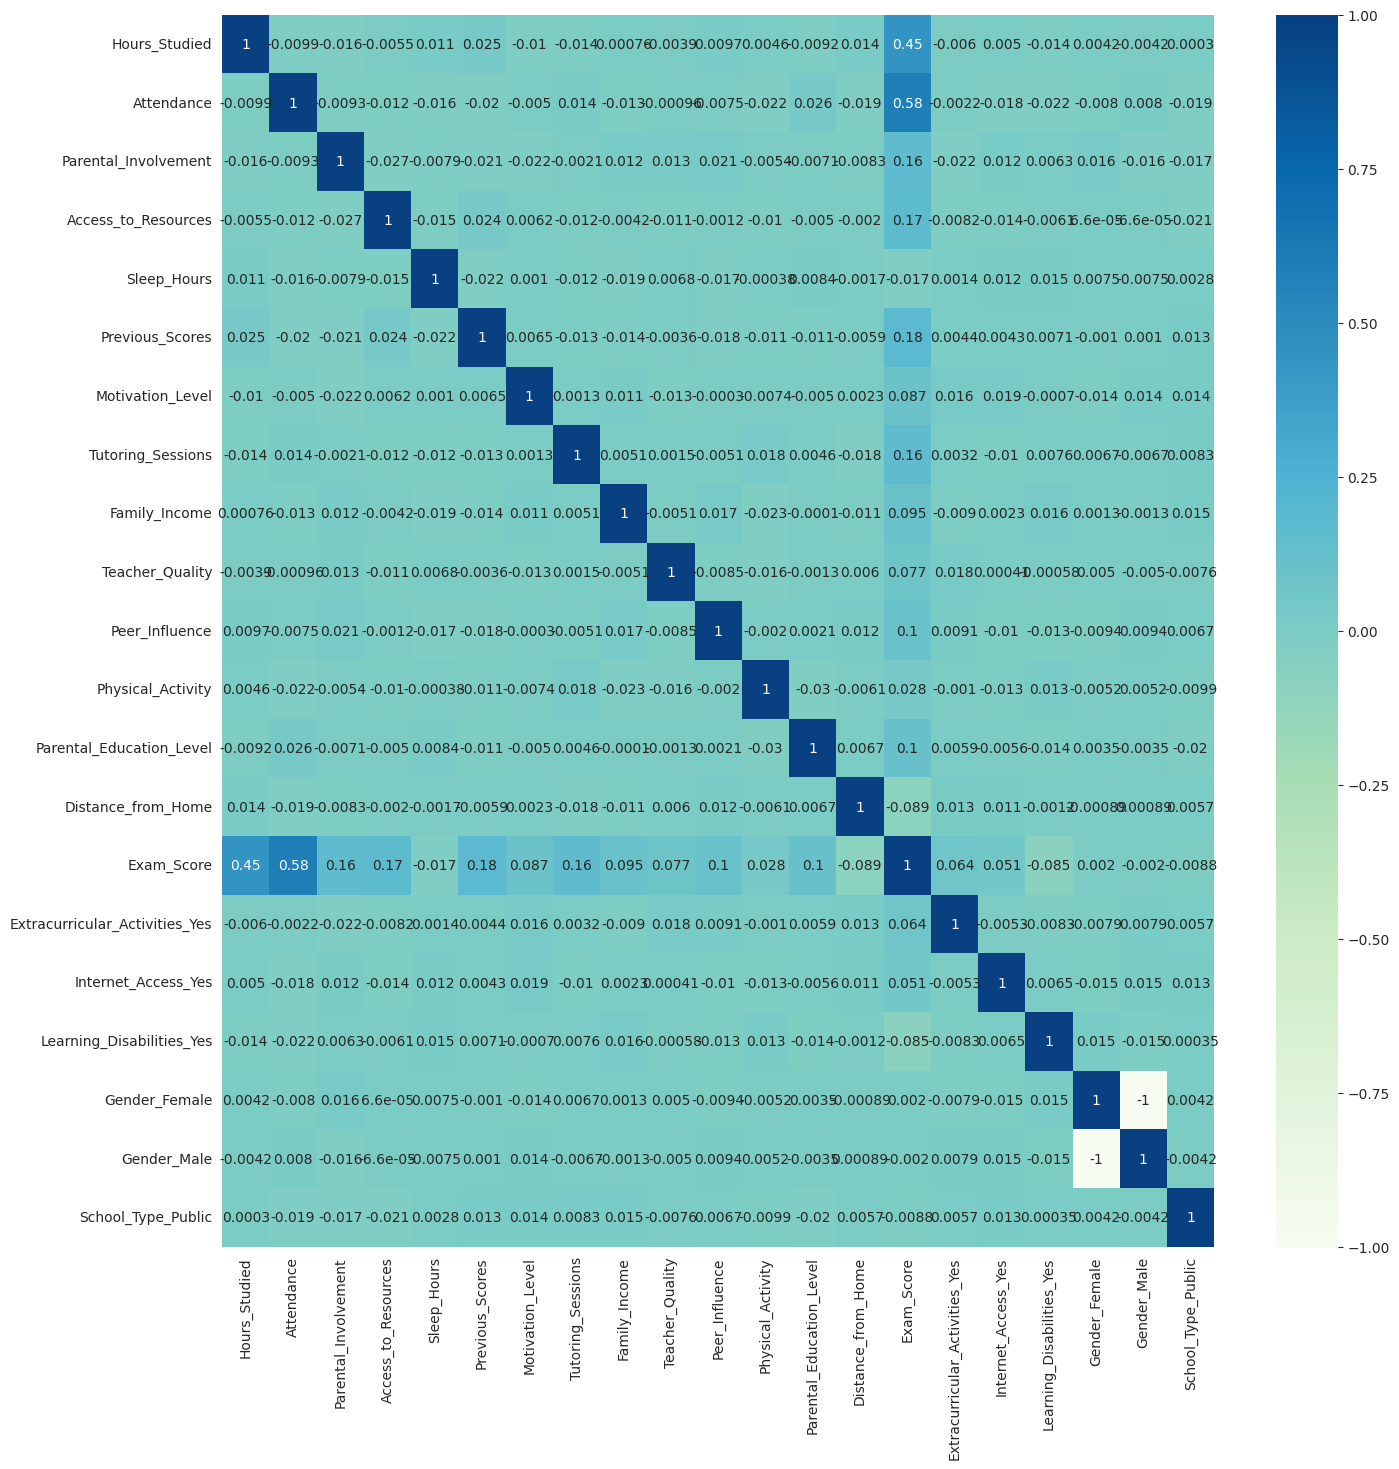

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap = "GnBu", vmin=-1, vmax=1)

## Análisis de valores atípicos

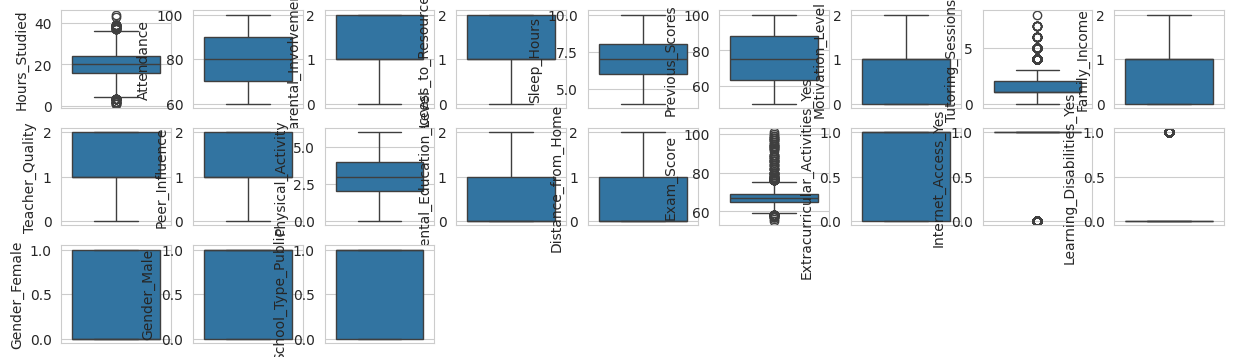

In [43]:
plt.figure(figsize = (15, 15))
c = df.columns
for i in range (len(c)):
  plt.subplot(10, 9 , i+1)
  sns.boxplot(df[c[i]])

## Análisis de valores nulos

<Axes: >

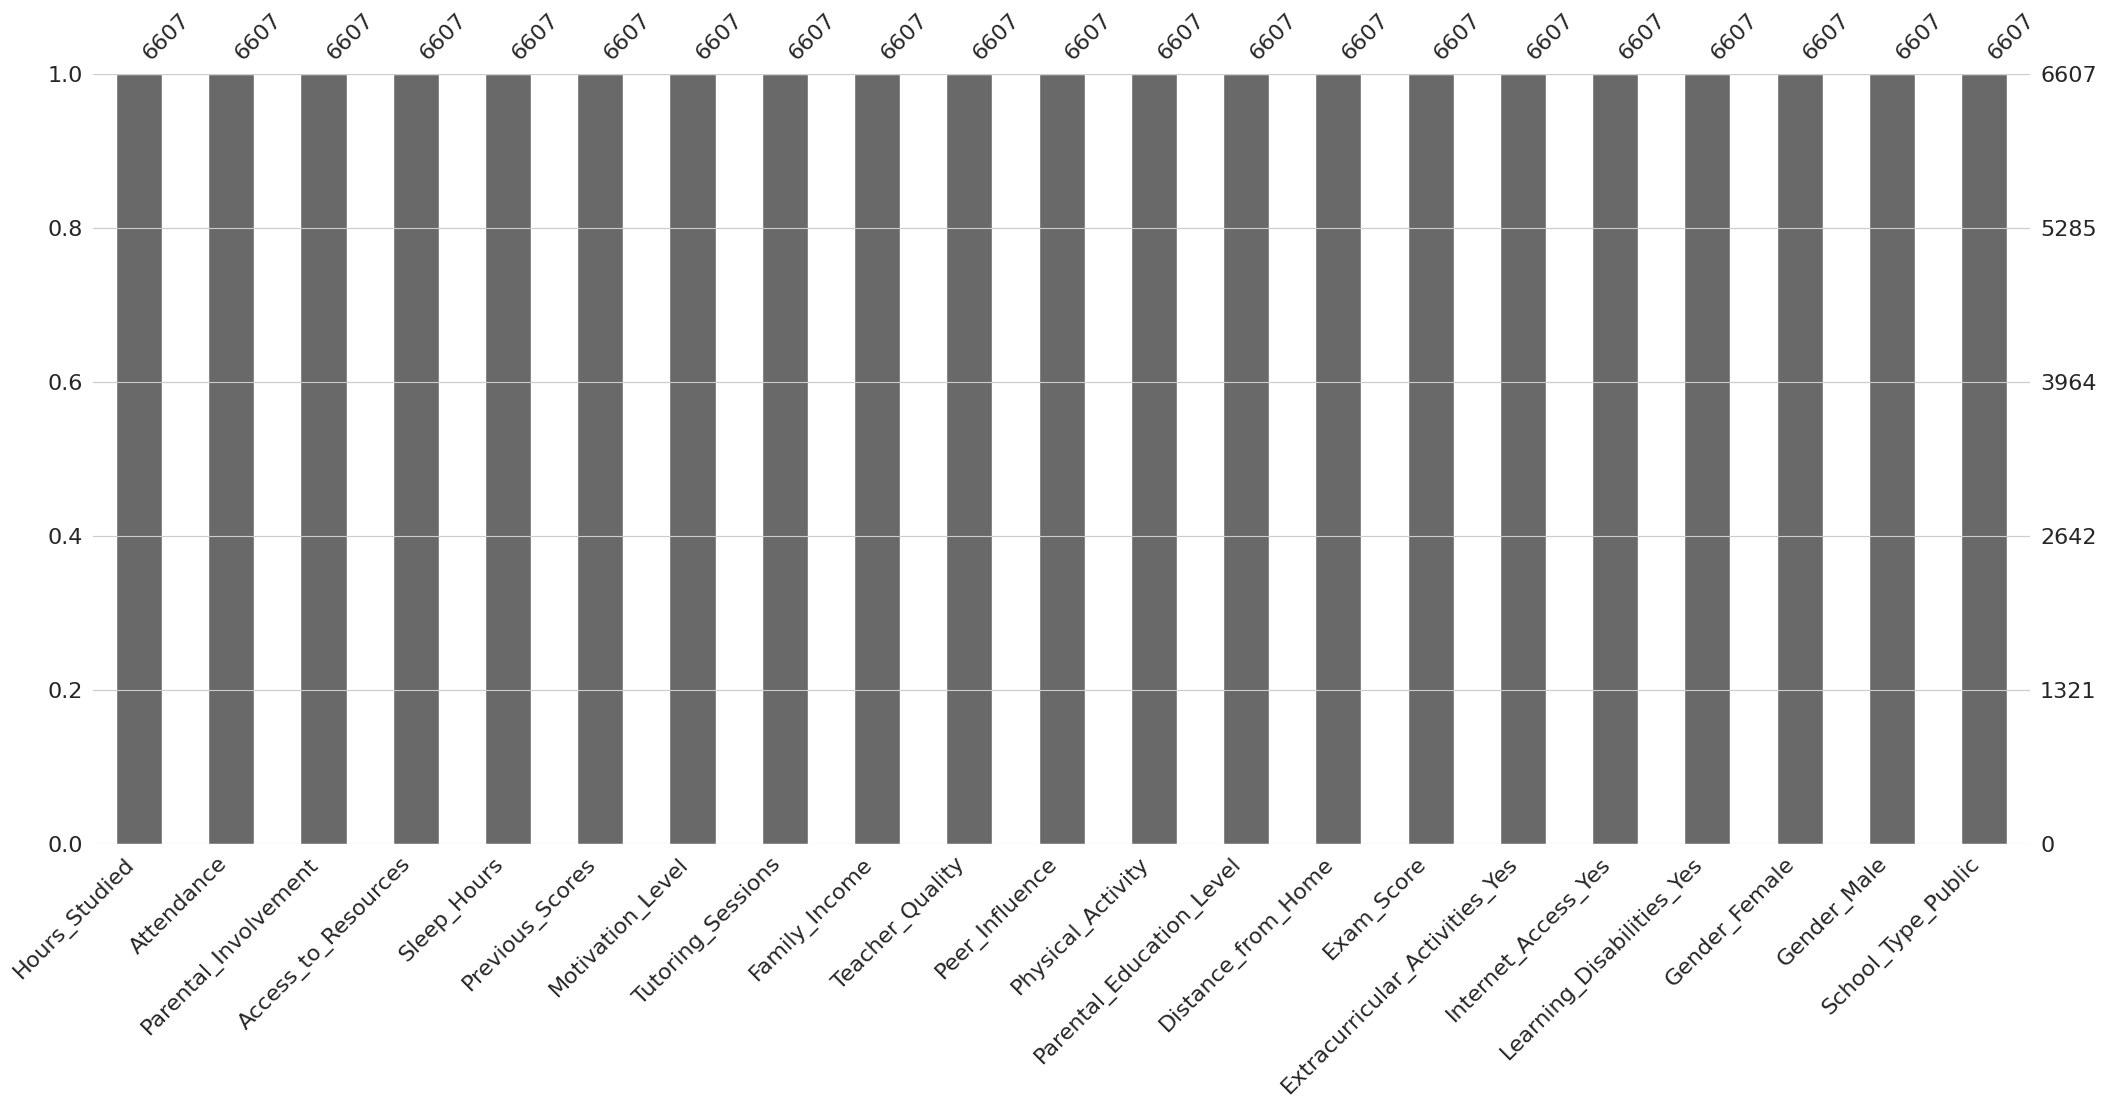

In [45]:
import missingno as msno
msno.bar(df)

<Axes: >

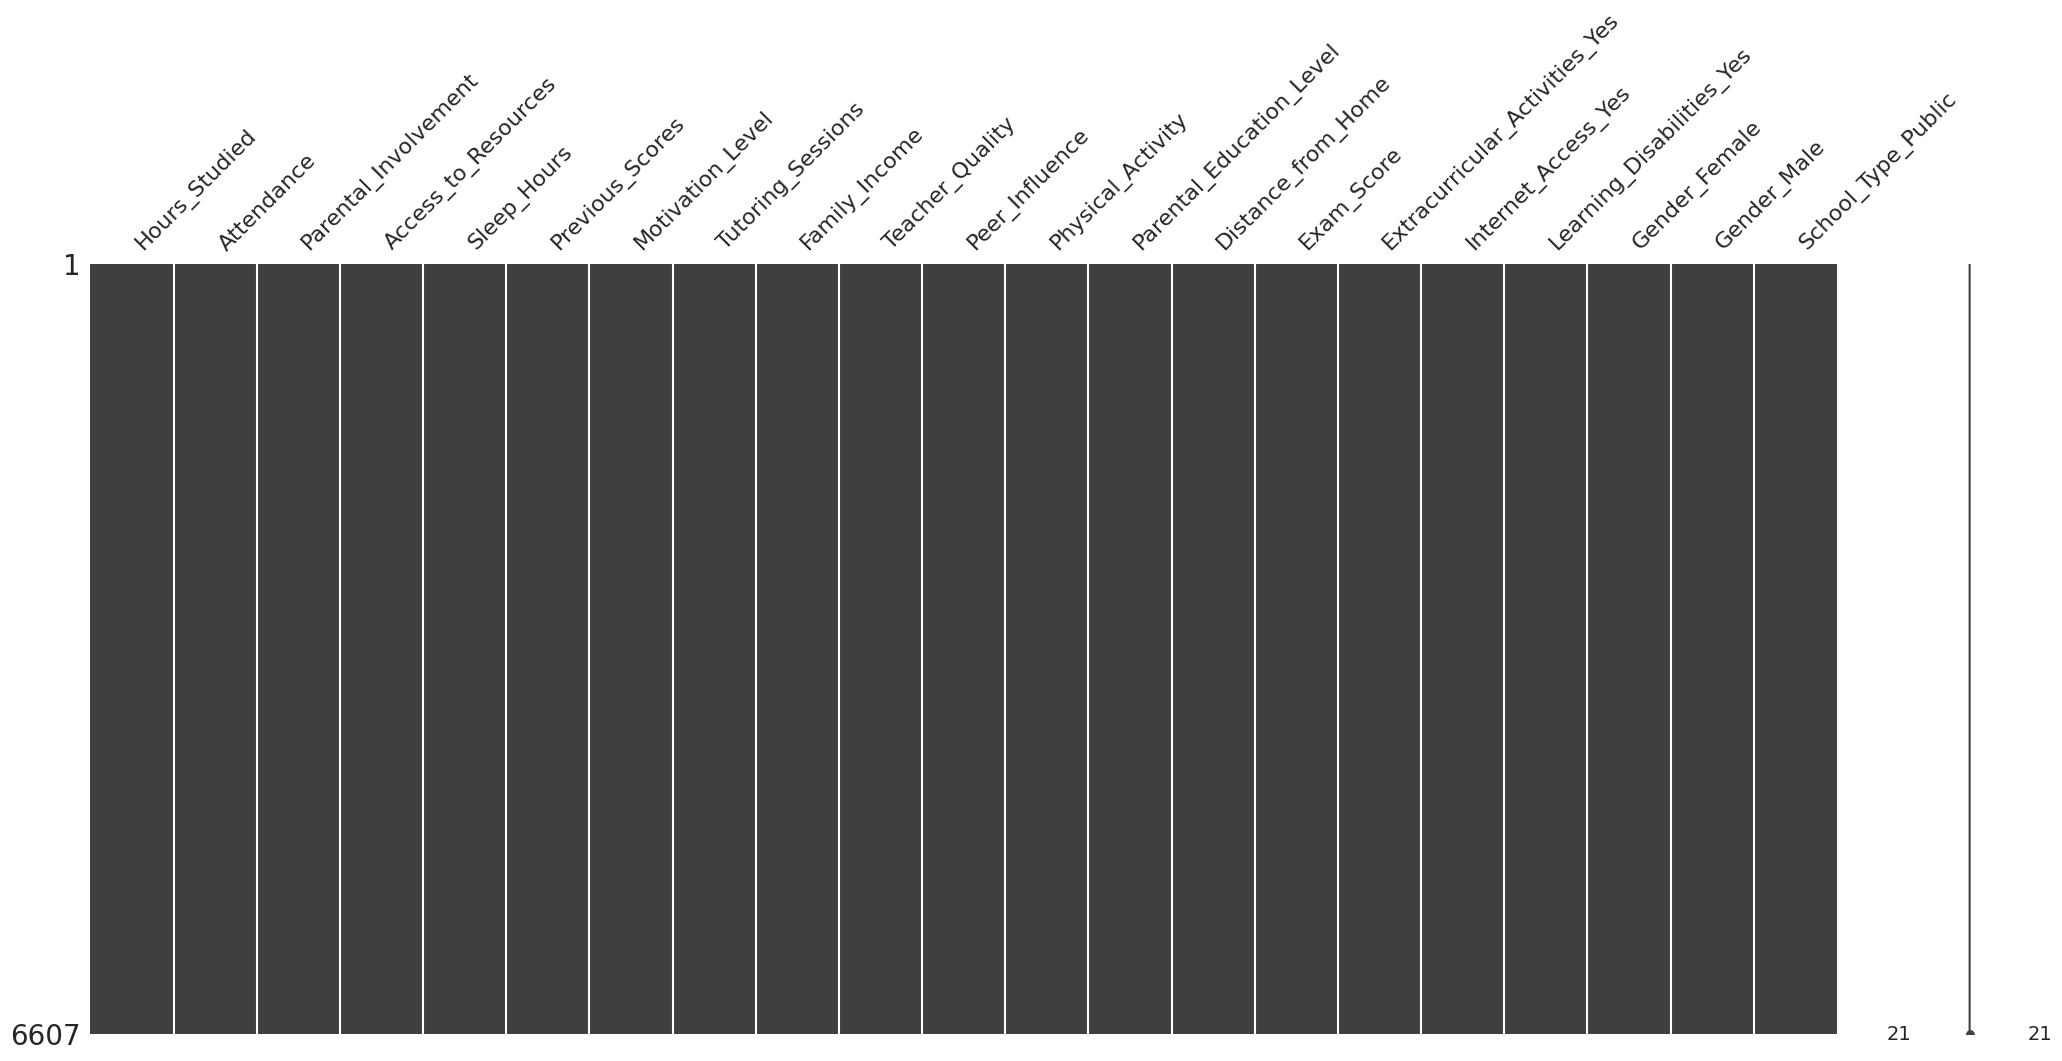

In [46]:
msno.matrix(df)